In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('cars_raw2.csv')
df.shape
df.head()
# Used/New, Price, ConsumerRating, ComfortRating, PerformanceRating, Engine, Mileage

,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,39998,4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,49985,4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,41860,4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,28500,5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,49000,4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [4]:
df.isnull().sum()

Year                       0
Make                       0
Model                      0
Used/New                   0
Price                      0
ConsumerRating             0
ConsumerReviews            0
SellerType                 0
SellerName                 0
SellerRating               0
SellerReviews              0
StreetName                 0
State                      0
Zipcode                    0
DealType                 222
ComfortRating              0
InteriorDesignRating       0
PerformanceRating          0
ValueForMoneyRating        0
ExteriorStylingRating      0
ReliabilityRating          0
ExteriorColor              0
InteriorColor              0
Drivetrain                 0
MinMPG                     0
MaxMPG                     0
FuelType                   0
Transmission               0
Engine                     0
VIN                        0
Stock#                     0
Mileage                    0
dtype: int64

In [5]:
df = df[df.Price != 'Not Priced']

In [6]:
df['Used/New'] = df['Used/New'].apply(lambda x: 'Certified' if 'Certified' in x else x)
df['Used/New'].value_counts()

Used         7896
Certified    1478
Name: Used/New, dtype: int64

In [7]:
df = df[df.Drivetrain != '–']
df.Drivetrain = df.Drivetrain.apply(lambda x: 'AWD' if 'All' in x else ('FWD' if 'Front' in x else (
                                                                        '4WD' if 'Four' in x else(
                                                                        'RWD' if 'Rear' in x else x))))
df.Drivetrain.value_counts()



AWD    4508
FWD    2363
4WD    1569
RWD     927
Name: Drivetrain, dtype: int64

In [8]:
# df.ConsumerRating = df.ConsumerRating.apply(lambda x: '>=4' if x >= 4 else '<4')
df.ValueForMoneyRating = df.ValueForMoneyRating.apply(lambda x: '>4.6' if x > 4.6 else ('<4.2' if x < 4.2 else '>=4.2 and <= 4.6'))
# Converting DriveTrain to Numerical Variable for Classification Model
df['ValueForMoneyRating'].value_counts()

>=4.2 and <= 4.6    4750
>4.6                3871
<4.2                 746
Name: ValueForMoneyRating, dtype: int64

In [9]:
df.drop(['Year', 'Make', 'Model', 'ConsumerReviews', 'SellerType', 'SellerName', 'SellerRating', 'SellerReviews', 'DealType'], axis=1)
# X = df[['Used/New_Certified', 'Used/New_Used', 'Price', 'ConsumerRating', 'ComfortRating', 'PerformanceRating', 'Drivetrain_4WD', 'Drivetrain_AWD', 'Drivetrain_FWD', 'Drivetrain_RWD','Mileage']]
X = df[['Used/New', 'Price', 'ConsumerRating', 'ComfortRating', 'PerformanceRating', 'Drivetrain','Mileage']]
y = df['ValueForMoneyRating']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train_predicted, y_test_predicted = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [10]:
X_train.isnull().sum()

Used/New             0
Price                0
ConsumerRating       0
ComfortRating        0
PerformanceRating    0
Drivetrain           0
Mileage              0
dtype: int64

In [11]:
X_test.isnull().sum()

Used/New             0
Price                0
ConsumerRating       0
ComfortRating        0
PerformanceRating    0
Drivetrain           0
Mileage              0
dtype: int64

In [12]:
# import category encoders

import category_encoders as ce
# encode categorical variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['Used/New', 'Drivetrain'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [13]:
X_train.shape
X_test.shape

(2811, 11)

In [14]:
X_test.head()

,Used/New_1,Used/New_2,Price,ConsumerRating,ComfortRating,PerformanceRating,Drivetrain_1,Drivetrain_2,Drivetrain_3,Drivetrain_4,Mileage
132,1,0,33895,4.6,4.8,4.6,0,0,0,1,79436
7716,1,0,29981,4.8,4.8,4.8,1,0,0,0,29584
4729,1,0,24319,4.7,4.8,4.7,1,0,0,0,82707
6971,0,1,38495,4.8,4.9,4.8,0,0,0,1,52278
5988,1,0,36450,4.9,4.9,5.0,0,0,1,0,14955


In [15]:
cols = X_train.columns

In [16]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [18]:
X_train

,Used/New_1,Used/New_2,Price,ConsumerRating,ComfortRating,PerformanceRating,Drivetrain_1,Drivetrain_2,Drivetrain_3,Drivetrain_4,Mileage
0,0.0,0.0,-0.466953,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.453846
1,0.0,0.0,-1.287671,-1.0,0.0,-0.5,1.0,0.0,0.0,0.0,1.074246
2,0.0,0.0,0.781800,-3.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.216259
3,0.0,0.0,-0.770016,0.0,0.5,0.5,0.0,1.0,0.0,0.0,0.315150
4,0.0,0.0,0.867741,0.0,0.5,0.5,1.0,0.0,0.0,0.0,-0.623561
...,...,...,...,...,...,...,...,...,...,...,...
6551,0.0,0.0,-1.025653,0.0,0.5,0.5,0.0,1.0,0.0,0.0,1.928793
6552,0.0,0.0,-0.022822,2.0,1.0,1.0,0.0,0.0,1.0,0.0,-0.523976
6553,0.0,0.0,-0.196600,-3.0,-1.0,-1.5,0.0,0.0,1.0,0.0,0.554786
6554,0.0,0.0,-0.885274,-1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.920909


In [19]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train_predicted)

GaussianNB()

In [22]:
print("Train score:", gnb.score(X_train, y_train_predicted))

Train score: 0.6956985967053081


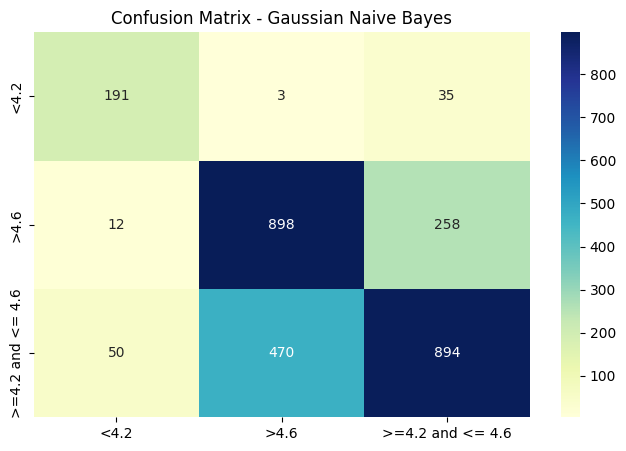

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = gnb.predict(X_test)
confmat = confusion_matrix(y_true=y_test_predicted, y_pred=y_pred)

index = ["<4.2", ">4.6", ">=4.2 and <= 4.6"]
columns = ["<4.2", ">4.6", ">=4.2 and <= 4.6"]
conf_matrix = pd.DataFrame(data=confmat, columns=columns, index=index)
plt.figure(figsize=(8, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Gaussian Naive Bayes")
plt.show()

In [24]:
X_train = scaler.inverse_transform(X_train)

In [25]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import graphviz

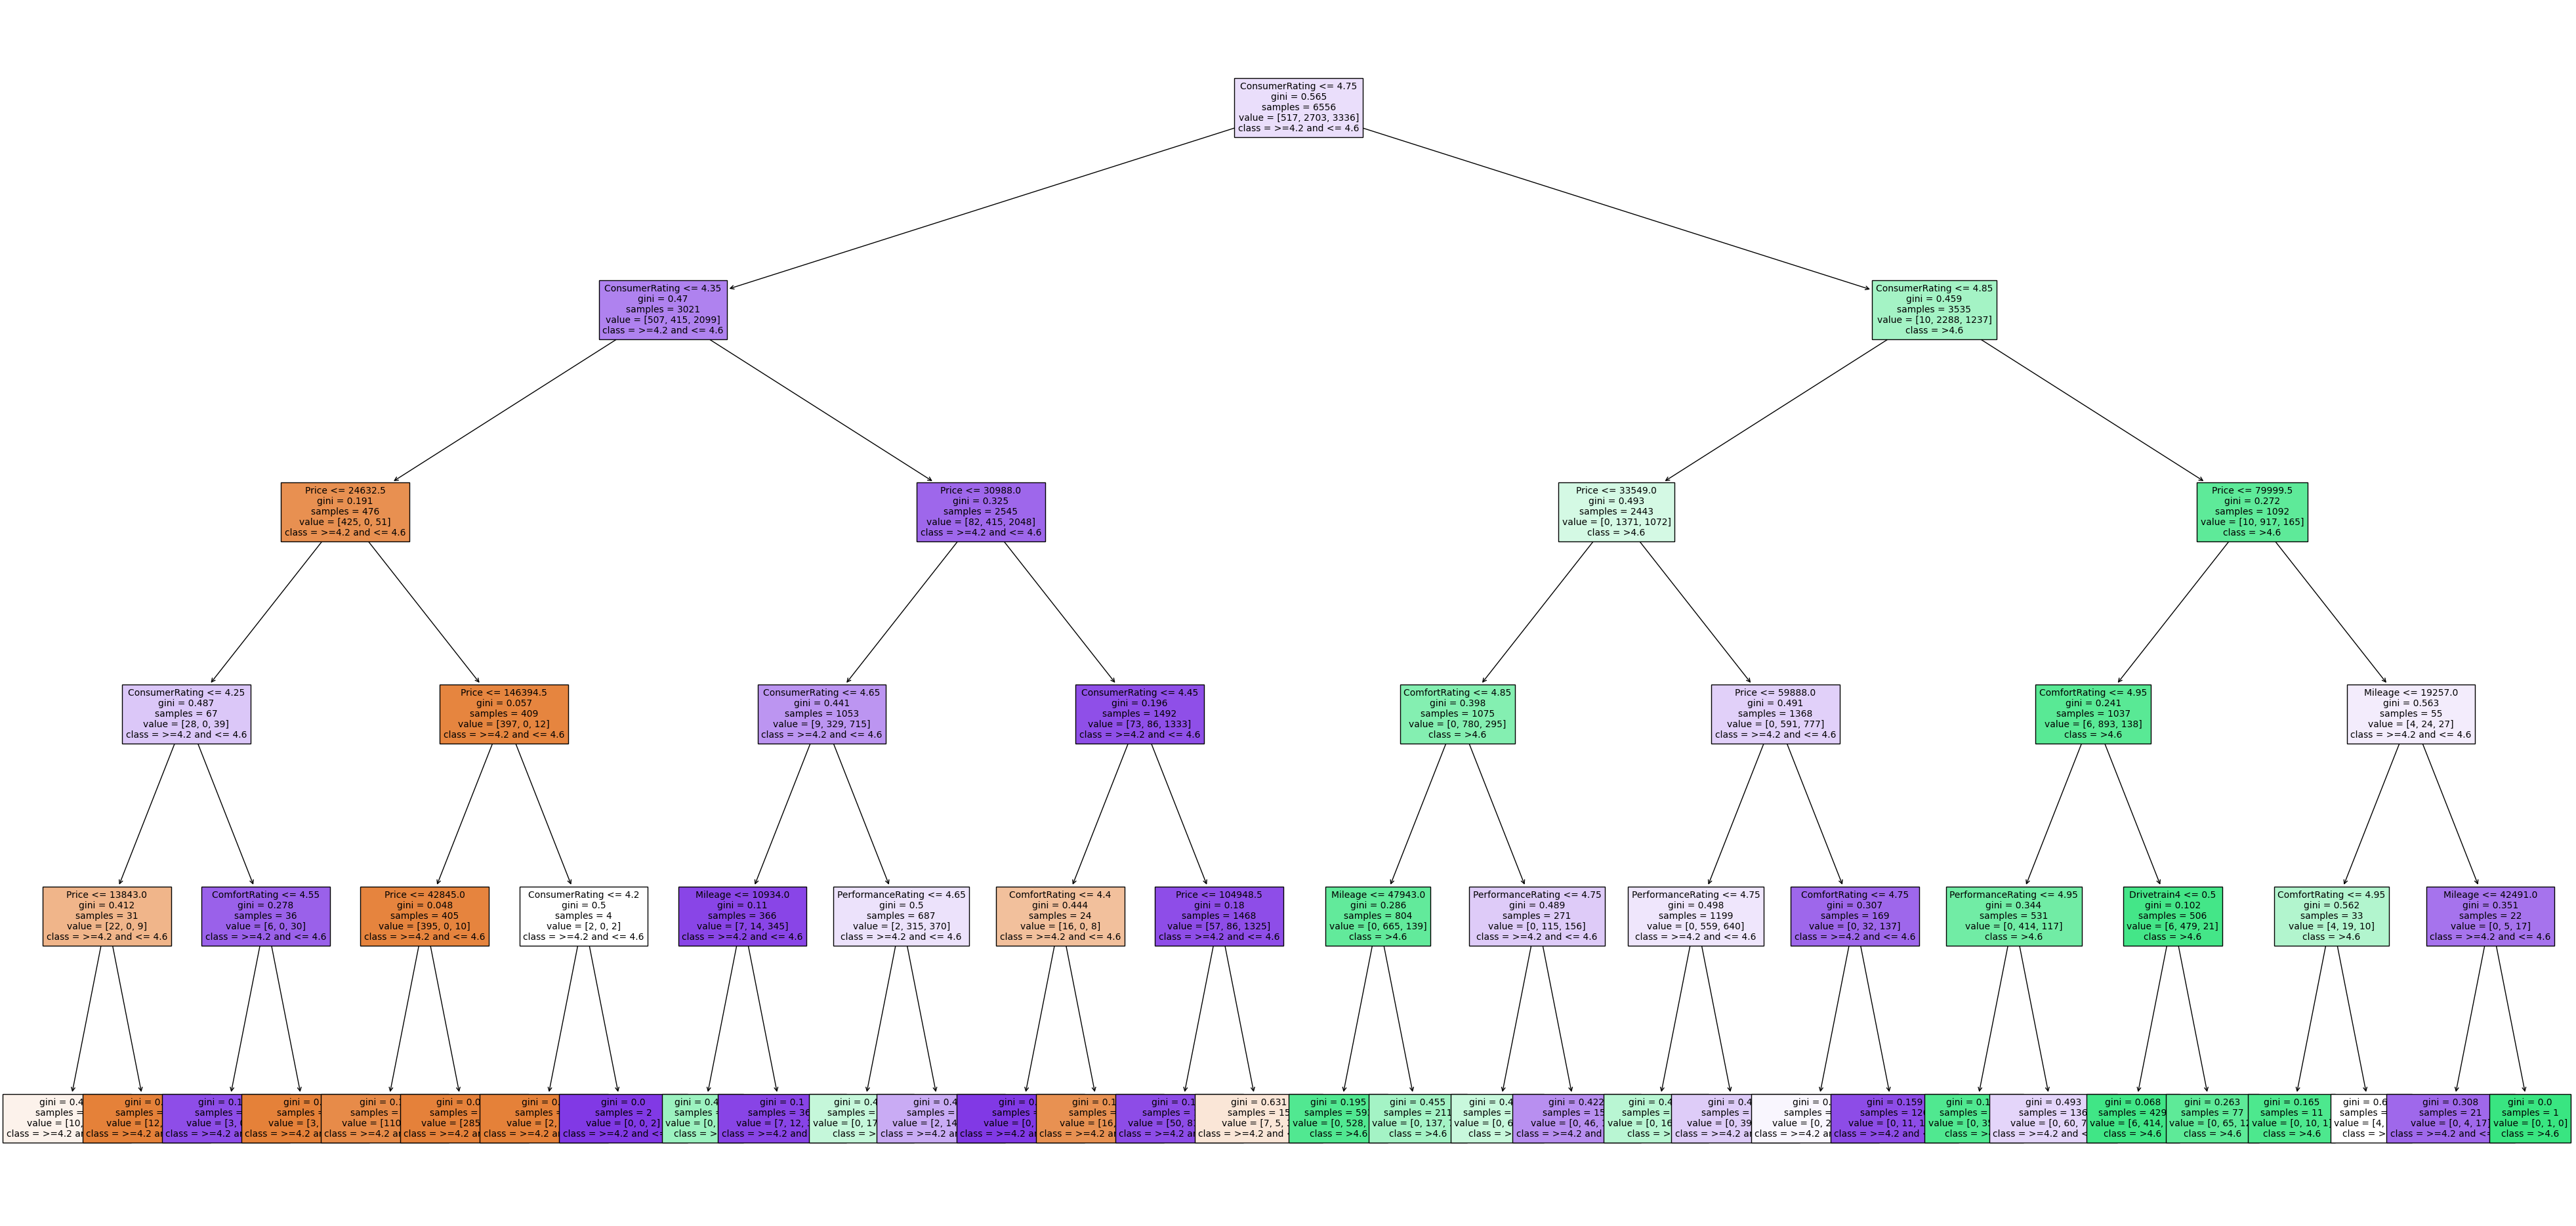

In [34]:
# Vẽ cây Decision Tree (ID3)
clf = DecisionTreeClassifier(random_state=0, criterion="gini", max_depth =5) #change the max depth value 
clf.fit(X_train, y_train_predicted)
fig, ax = plt.subplots(figsize=(50,24))
tree.plot_tree(clf, feature_names= ['Used/New_1', 'Used/New_2', 'Price', 'ConsumerRating', 'ComfortRating', 
'PerformanceRating', 'Drivetrain1', 'Drivetrain2', 'Drivetrain3', 'Drivetrain4','Mileage'], class_names=y_pred_100,filled=True,fontsize=10)
plt.savefig('decision_tree_id3_test',dpi=100)
plt.show()

In [35]:
rules = tree.export_text(clf, feature_names = ['Used/New_1', 'Used/New_2', 'Price', 'ConsumerRating', 'ComfortRating', 'PerformanceRating', 'Drivetrain1', 'Drivetrain2', 'Drivetrain3', 'Drivetrain4','Mileage'])
print(rules)

|--- ConsumerRating <= 4.75
|   |--- ConsumerRating <= 4.35
|   |   |--- Price <= 24632.50
|   |   |   |--- ConsumerRating <= 4.25
|   |   |   |   |--- Price <= 13843.00
|   |   |   |   |   |--- class: <4.2
|   |   |   |   |--- Price >  13843.00
|   |   |   |   |   |--- class: <4.2
|   |   |   |--- ConsumerRating >  4.25
|   |   |   |   |--- ComfortRating <= 4.55
|   |   |   |   |   |--- class: >=4.2 and <= 4.6
|   |   |   |   |--- ComfortRating >  4.55
|   |   |   |   |   |--- class: <4.2
|   |   |--- Price >  24632.50
|   |   |   |--- Price <= 146394.50
|   |   |   |   |--- Price <= 42845.00
|   |   |   |   |   |--- class: <4.2
|   |   |   |   |--- Price >  42845.00
|   |   |   |   |   |--- class: <4.2
|   |   |   |--- Price >  146394.50
|   |   |   |   |--- ConsumerRating <= 4.20
|   |   |   |   |   |--- class: <4.2
|   |   |   |   |--- ConsumerRating >  4.20
|   |   |   |   |   |--- class: >=4.2 and <= 4.6
|   |--- ConsumerRating >  4.35
|   |   |--- Price <= 30988.00
|   |   |   |